In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train_E1GspfA.csv")
test=pd.read_csv("test_6QvDdzb.csv")

In [3]:
df.head()

date  hour  demand
0  2018-08-18     9      91
1  2018-08-18    10      21
2  2018-08-18    13      23
3  2018-08-18    14     104
4  2018-08-18    15      81

In [4]:
df.tail()

date  hour  demand
18242  2021-02-28    19      95
18243  2021-02-28    20      88
18244  2021-02-28    21      39
18245  2021-02-28    22     104
18246  2021-02-28    23      85

In [5]:
df.shape

(18247, 3)

In [6]:
test.head()

date  hour
0  2021-03-01     0
1  2021-03-01     1
2  2021-03-01     2
3  2021-03-01     3
4  2021-03-01     5

In [7]:
test.shape

(7650, 2)

In [8]:
df.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [9]:
#checking the datatypes of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [10]:
#Combine date and hour into one column
df['datetime'] = pd.to_datetime(df.date) + pd.to_timedelta(df.hour , unit= 'h')

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df=df.set_index('datetime')

In [13]:
df.head(2)

date  hour  demand
datetime                                    
2018-08-18 09:00:00 2018-08-18     9      91
2018-08-18 10:00:00 2018-08-18    10      21

<AxesSubplot:xlabel='date'>

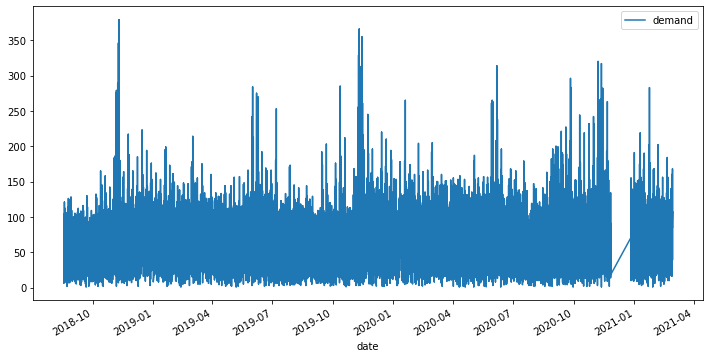

In [14]:
df.plot(x='date',y='demand',figsize=(12,6))

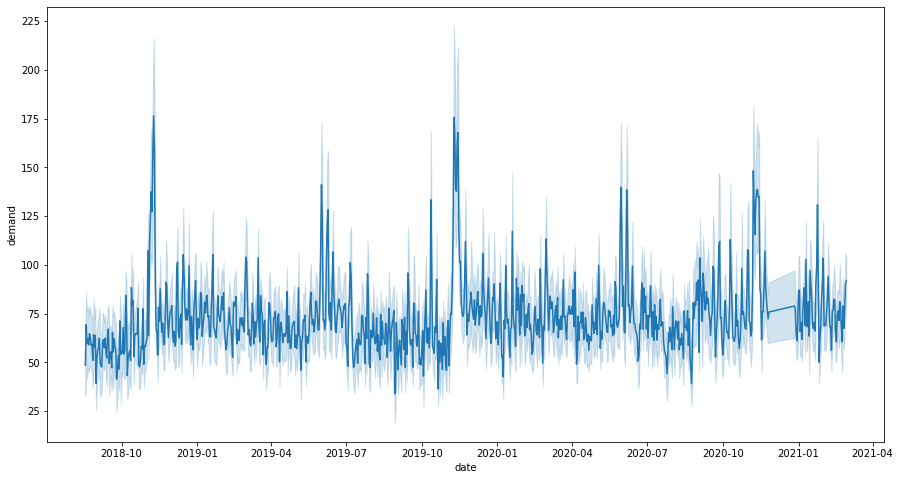

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='demand',data=df)
plt.show()

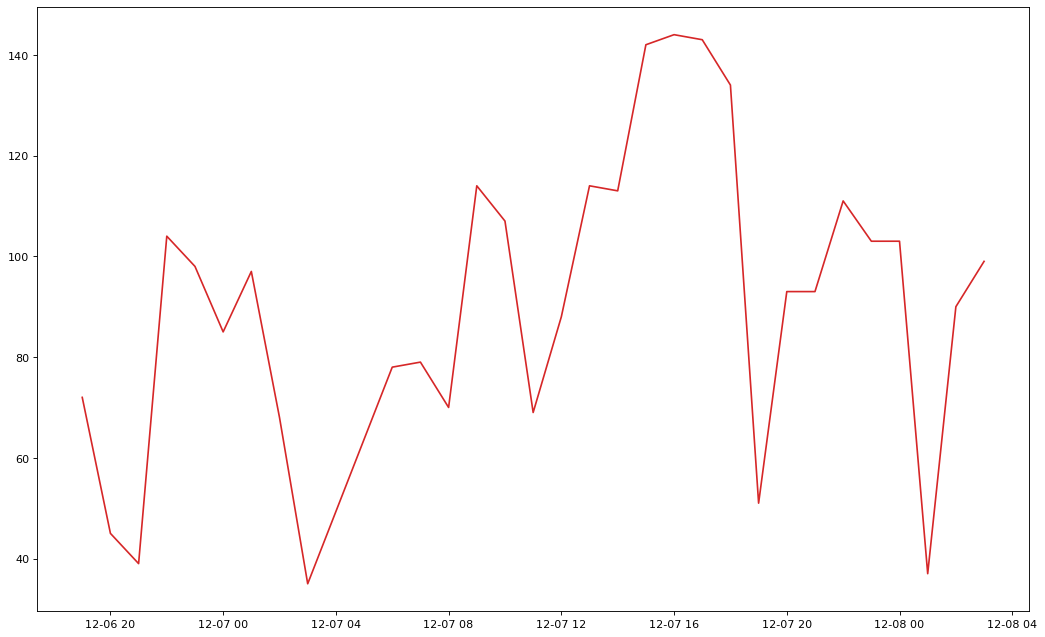

In [16]:
data=df[2020-12-26:2020-1-6]
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(data.index, 'demand', data=data, color='tab:red')

In [17]:
data

date  hour  demand
datetime                                    
2018-12-06 19:00:00 2018-12-06    19      72
2018-12-06 20:00:00 2018-12-06    20      45
2018-12-06 21:00:00 2018-12-06    21      39
2018-12-06 22:00:00 2018-12-06    22     104
2018-12-06 23:00:00 2018-12-06    23      98
2018-12-07 00:00:00 2018-12-07     0      85
2018-12-07 01:00:00 2018-12-07     1      97
2018-12-07 02:00:00 2018-12-07     2      68
2018-12-07 03:00:00 2018-12-07     3      35
2018-12-07 06:00:00 2018-12-07     6      78
2018-12-07 07:00:00 2018-12-07     7      79
2018-12-07 08:00:00 2018-12-07     8      70
2018-12-07 09:00:00 2018-12-07     9     114
2018-12-07 10:00:00 2018-12-07    10     107
2018-12-07 11:00:00 2018-12-07    11      69
2018-12-07 12:00:00 2018-12-07    12      88
2018-12-07 13:00:00 2018-12-07    13     114
2018-12-07 14:00:00 2018-12-07    14     113
2018-12-07 15:00:00 2018-12-07    15     142
2018-12-07 16:00:00 2018-12-07    16     144
2018-12-07 17:00:00 2018-12-07    17     143
2018-12-07 18:00:00 2018-12-07    18     134
2018-12-07 19:00:00 2018-12-07    19      51
2018-12-07 20:00:00 2018-12-07    20      93
2018-12-07 21:00:00 2018-12-07    21      93
2018-12-07 22:00:00 2018-12-07    22     111
2018-12-07 23:00:00 2018-12-07    23     103
2018-12-08 00:00:00 2018-12-08     0     103
2018-12-08 01:00:00 2018-12-08     1      37
2018-12-08 02:00:00 2018-12-08     2      90
2018-12-08 03:00:00 2018-12-08     3      99

In [18]:
pd.date_range( start="2018-08-18", end="2021-02-28").difference(df.index)

DatetimeIndex(['2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
               '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-27',
               '2018-08-28', '2018-08-30',
               ...
               '2020-12-24', '2020-12-25', '2020-12-26', '2021-01-06',
               '2021-01-07', '2021-01-26', '2021-01-30', '2021-02-03',
               '2021-02-10', '2021-02-11'],
              dtype='datetime64[ns]', length=200, freq=None)

In [19]:
np.unique((df.index[:-1]-df.index[1:]).days.values,return_counts=True)

(array([-31,  -2,  -1], dtype=int64),
 array([    1,     1, 18244], dtype=int64))

In [20]:
df.index[:-1]

DatetimeIndex(['2018-08-18 09:00:00', '2018-08-18 10:00:00',
               '2018-08-18 13:00:00', '2018-08-18 14:00:00',
               '2018-08-18 15:00:00', '2018-08-18 16:00:00',
               '2018-08-18 17:00:00', '2018-08-18 18:00:00',
               '2018-08-18 19:00:00', '2018-08-18 20:00:00',
               ...
               '2021-02-28 13:00:00', '2021-02-28 14:00:00',
               '2021-02-28 15:00:00', '2021-02-28 16:00:00',
               '2021-02-28 17:00:00', '2021-02-28 18:00:00',
               '2021-02-28 19:00:00', '2021-02-28 20:00:00',
               '2021-02-28 21:00:00', '2021-02-28 22:00:00'],
              dtype='datetime64[ns]', name='datetime', length=18246, freq=None)

In [21]:
missing=df.index-df.index.shift(1,freq='H')

In [22]:
df.index.shift(1,freq='H')

DatetimeIndex(['2018-08-18 10:00:00', '2018-08-18 11:00:00',
               '2018-08-18 14:00:00', '2018-08-18 15:00:00',
               '2018-08-18 16:00:00', '2018-08-18 17:00:00',
               '2018-08-18 18:00:00', '2018-08-18 19:00:00',
               '2018-08-18 20:00:00', '2018-08-18 21:00:00',
               ...
               '2021-02-28 15:00:00', '2021-02-28 16:00:00',
               '2021-02-28 17:00:00', '2021-02-28 18:00:00',
               '2021-02-28 19:00:00', '2021-02-28 20:00:00',
               '2021-02-28 21:00:00', '2021-02-28 22:00:00',
               '2021-02-28 23:00:00', '2021-03-01 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=18247, freq=None)

In [23]:
df.index

DatetimeIndex(['2018-08-18 09:00:00', '2018-08-18 10:00:00',
               '2018-08-18 13:00:00', '2018-08-18 14:00:00',
               '2018-08-18 15:00:00', '2018-08-18 16:00:00',
               '2018-08-18 17:00:00', '2018-08-18 18:00:00',
               '2018-08-18 19:00:00', '2018-08-18 20:00:00',
               ...
               '2021-02-28 14:00:00', '2021-02-28 15:00:00',
               '2021-02-28 16:00:00', '2021-02-28 17:00:00',
               '2021-02-28 18:00:00', '2021-02-28 19:00:00',
               '2021-02-28 20:00:00', '2021-02-28 21:00:00',
               '2021-02-28 22:00:00', '2021-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=18247, freq=None)

In [24]:
missing[missing.days<-1]

TimedeltaIndex([], dtype='timedelta64[ns]', name='datetime', freq=None)

In [25]:
missing.days.values

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [26]:
np.unique(missing.days.values)

array([-1], dtype=int64)

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

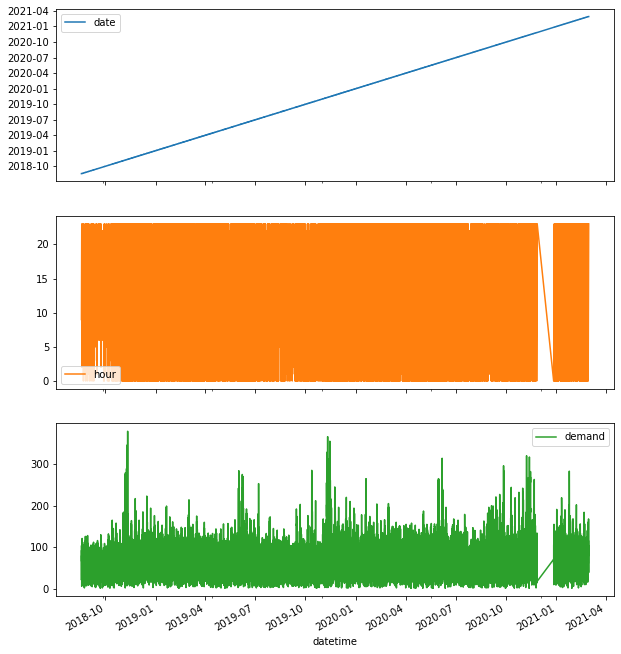

In [27]:
df.plot(subplots=True, figsize=(10, 12))

In [28]:
# df['dayofweek'] = df['date'].dt.dayofweek
# df['quarter'] = df['date'].dt.quarter
# df['month'] = df['date'].dt.month
# df['year'] = df['date'].dt.year
# df['dayofyear'] = df['date'].dt.dayofyear
# df['dayofmonth'] = df['date'].dt.day
# df['weekofyear'] = df['date'].dt.weekofyear

In [29]:
df=df.drop(['date','hour'],axis=1)

In [30]:
df.head()

demand
datetime                   
2018-08-18 09:00:00      91
2018-08-18 10:00:00      21
2018-08-18 13:00:00      23
2018-08-18 14:00:00     104
2018-08-18 15:00:00      81

<function matplotlib.pyplot.show(close=None, block=None)>

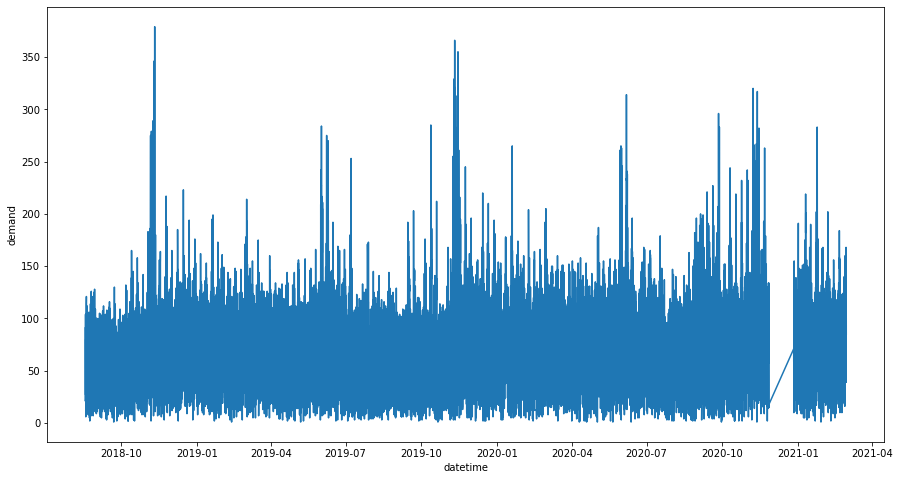

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df['demand'].rolling(window=1).mean())
plt.show

<AxesSubplot:xlabel='datetime', ylabel='demand'>

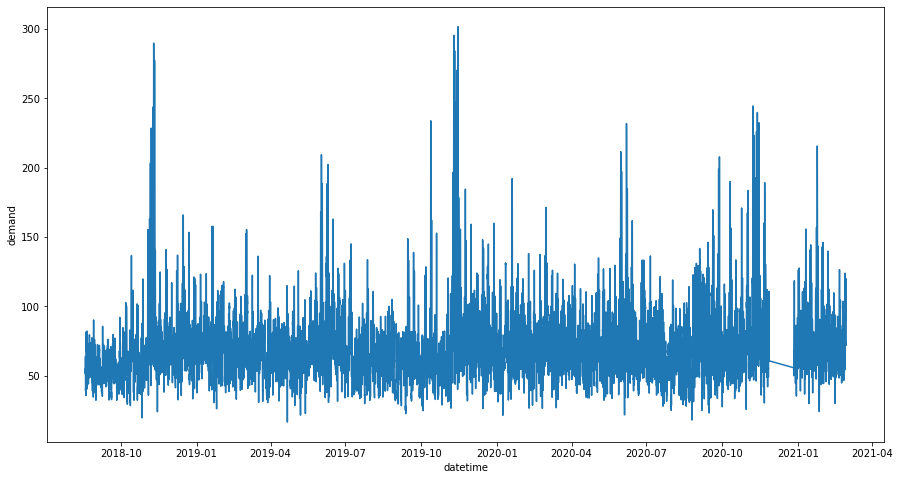

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df['demand'].rolling(window=7).mean())

<AxesSubplot:xlabel='datetime', ylabel='demand'>

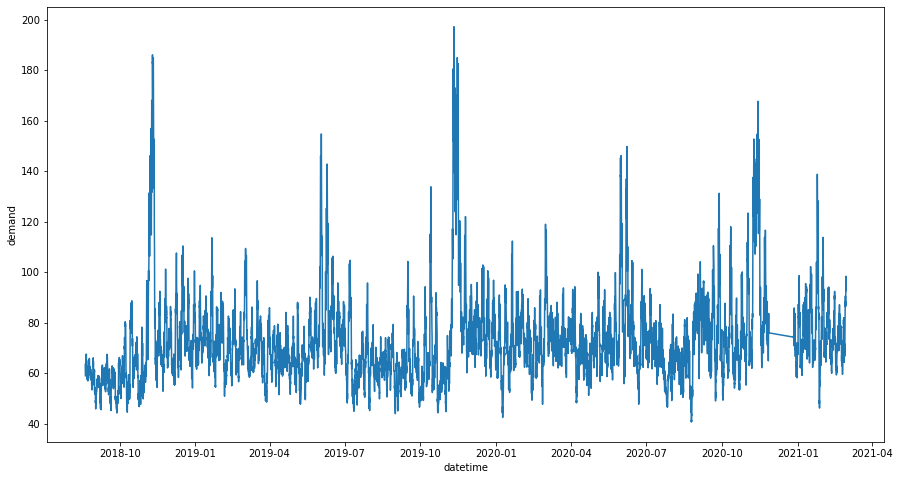

In [33]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df['demand'].rolling(window=30).mean())

<AxesSubplot:xlabel='datetime', ylabel='demand'>

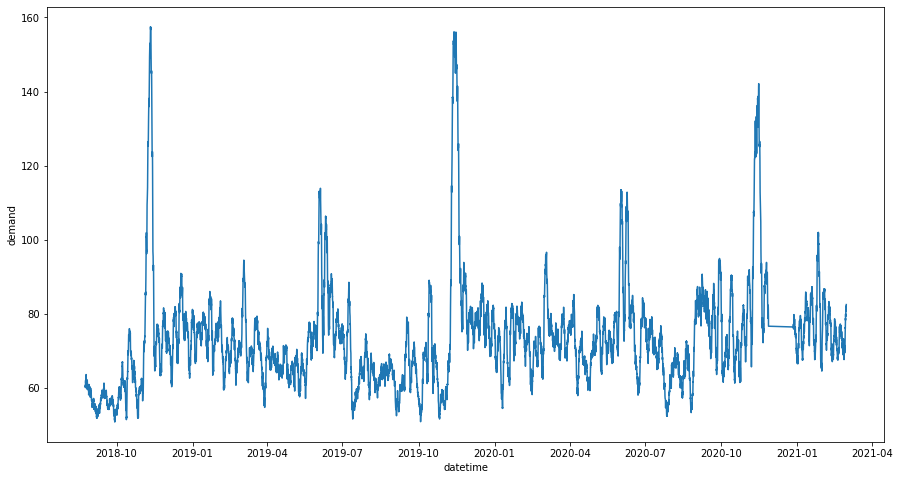

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df['demand'].rolling(window=90).mean())

In [35]:
import plotly.express as px

In [36]:
fig = px.line(x=[df.index],y=df['demand'],title='Demand of car rentals on hourly basis')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
    buttons=list([
        dict(count=1,label='1y',step='year',stepmode='backward'),
        dict(count=2,label='2y',step='year',stepmode='backward'),
        dict(count=3,label='3y',step='year',stepmode='backward'),
        dict(step='all')
])
)
)

fig.show()

In [37]:
df.describe()

demand
count  18247.000000
mean      73.991451
std       41.678988
min        1.000000
25%       43.000000
50%       71.000000
75%       98.000000
max      379.000000

In [38]:
print(df.loc[df['demand']==df['demand'].max()])
print(df.loc[df['demand']==df['demand'].min()])

                     demand
datetime                   
2018-11-10 17:00:00     379
                     demand
datetime                   
2018-09-21 21:00:00       1
2019-02-12 06:00:00       1
2019-05-07 06:00:00       1
2019-10-21 06:00:00       1
2020-04-10 06:00:00       1
2020-04-19 03:00:00       1
2020-05-02 04:00:00       1
2020-05-21 00:00:00       1
2020-06-12 05:00:00       1
2020-09-30 02:00:00       1
2020-11-12 06:00:00       1
2021-01-29 04:00:00       1


In [39]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.demand.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.543617
p-value: 0.000000


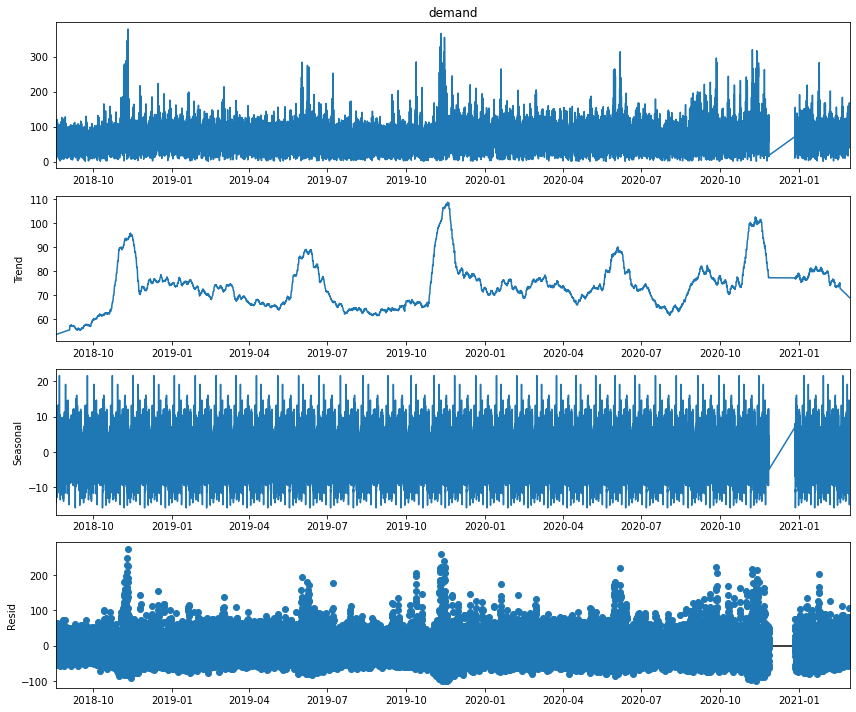

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df.demand,model='additive',extrapolate_trend='freq',freq=500)

plt.rcParams.update({'figure.figsize':(12,10)})
result.plot()
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

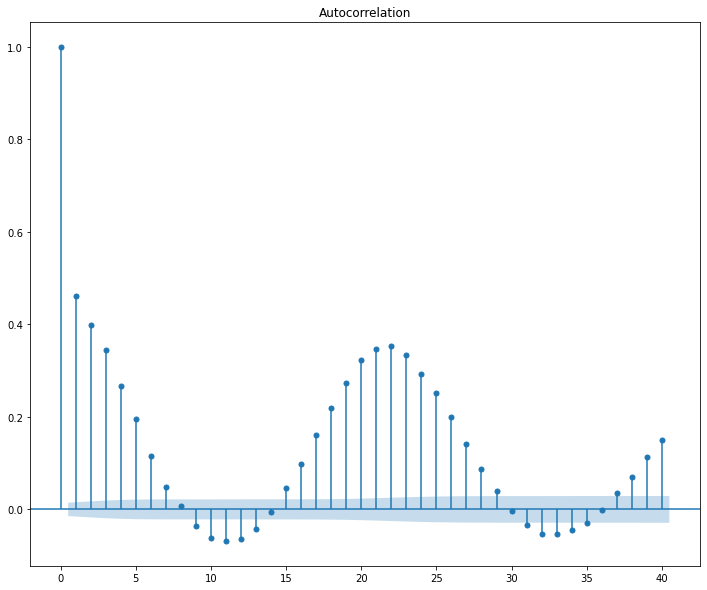

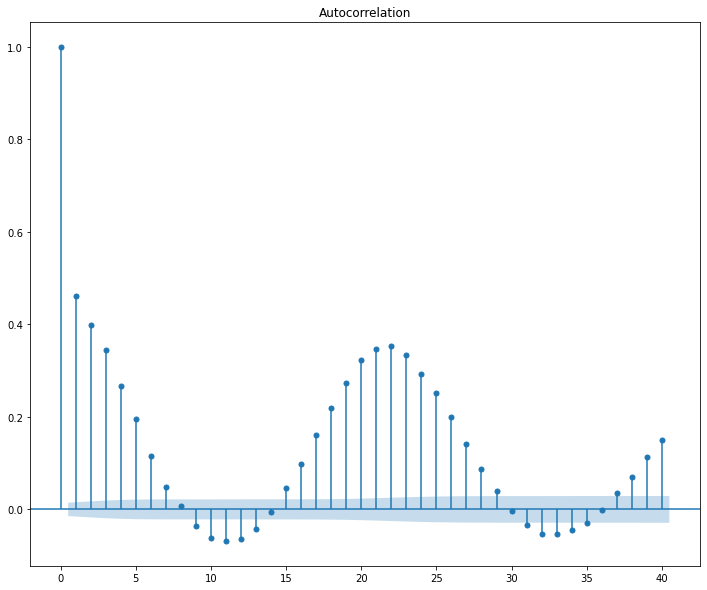

In [42]:
plot_acf(df['demand'],lags=40)

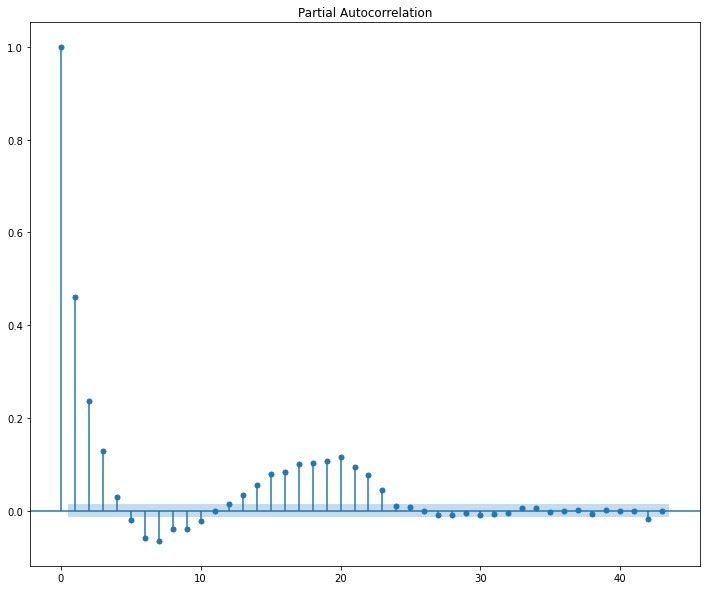

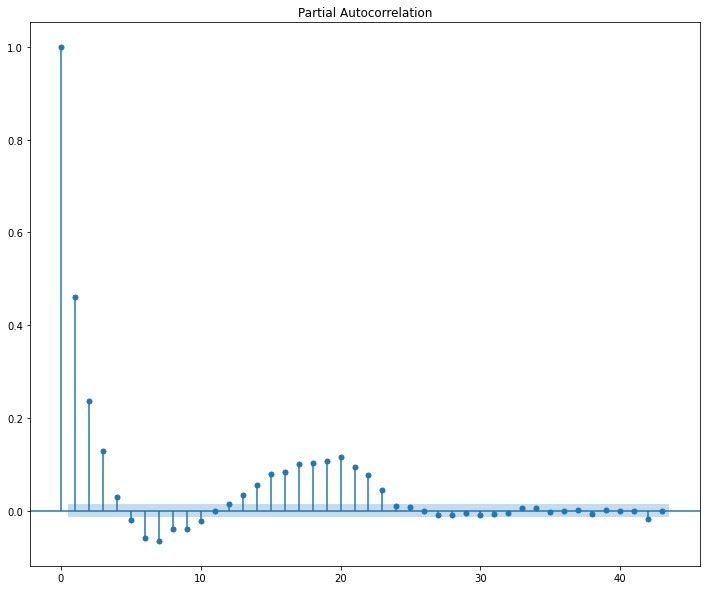

In [43]:
plot_pacf(df['demand'])

In [44]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2020,1,1)
test_dataset_end=datetime(2020,1,20)

In [45]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end:]

In [46]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train_data.demand, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                 demand   No. Observations:                 9798
Model:                     ARMA(1, 2)   Log Likelihood              -48869.078
Method:                       css-mle   S.D. of innovations             35.470
Date:                Sat, 23 Apr 2022   AIC                          97748.155
Time:                        23:47:57   BIC                          97784.105
Sample:                             0   HQIC                         97760.336
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.5079      1.090     66.541      0.000      70.372      74.644
ar.L1.demand     0.8147      0.010     81.495      0.000       0.795       0.834
ma.L1.demand    -0.5090      0.014    -36.65

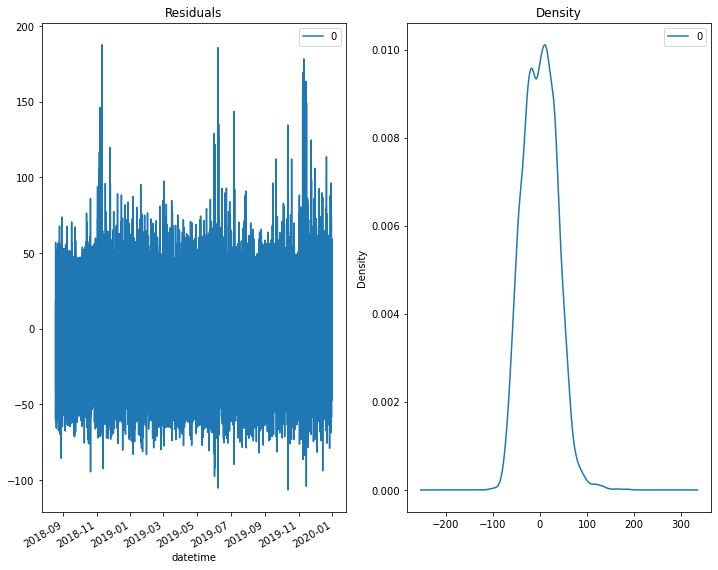

In [47]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

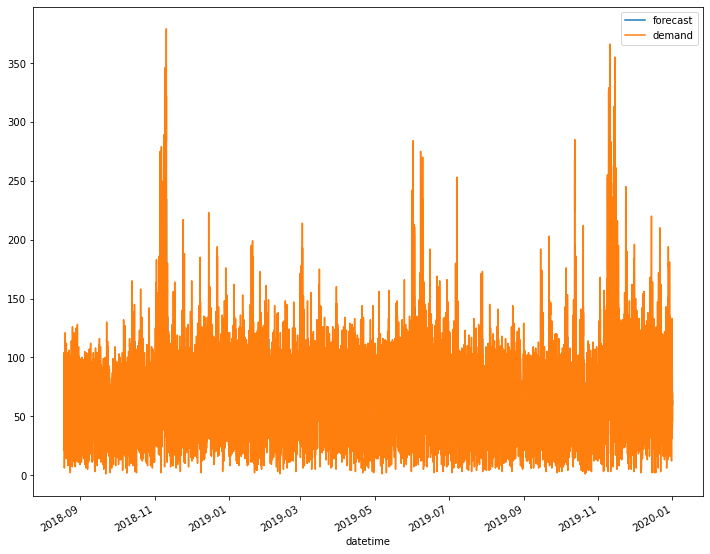

In [48]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [49]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


2020-01-01 00:00:00
2021-02-28 23:00:00


In [50]:
pred=model_fit.forecast(7650)
#residuals=test_data['demand']-pred

In [51]:
pred

(array([60.31547473, 61.34351157, 63.41196718, ..., 72.50788656,
        72.50788656, 72.50788656]),
 array([35.47035689, 37.09051779, 38.80608847, ..., 41.98775   ,
        41.98775   , 41.98775   ]),
 array([[ -9.20514729, 129.83609675],
        [-11.35256746, 134.03959061],
        [-12.64656859, 139.47050296],
        ...,
        [ -9.78659123, 154.80236434],
        [ -9.78659123, 154.80236434],
        [ -9.78659123, 154.80236434]]))

In [85]:
test.head()

hour  month  year  dayofmonth
0     0      3  2021           1
1     1      3  2021           1
2     2      3  2021           1
3     3      3  2021           1
4     5      3  2021           1

In [53]:
test['demand']=pred[0]

In [54]:
test.head()

date  hour     demand
0  2021-03-01     0  60.315475
1  2021-03-01     1  61.343512
2  2021-03-01     2  63.411967
3  2021-03-01     3  65.097194
4  2021-03-01     5  66.470194

In [55]:
test.shape

(7650, 3)

In [56]:
test.tail()

date  hour     demand
7645  2022-03-28    19  72.507887
7646  2022-03-28    20  72.507887
7647  2022-03-28    21  72.507887
7648  2022-03-28    22  72.507887
7649  2022-03-28    23  72.507887

In [57]:
test.to_csv('submission.csv',index=False)

In [58]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [59]:
stepwise_model = auto_arima(train_data.demand, start_p=5, start_q=1,
                            m=12,max_order=12, seasonal=True,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
stepwise_model.summary()

In [ ]:
stepwise_model.plot_diagnostics()

In [ ]:
predict=stepwise_model.predict(7650)

In [ ]:
predict

In [ ]:
test=test.drop(['demand'],axis=1)

In [ ]:
test["demand"]=predict

In [ ]:
test.head()

In [ ]:
test.to_csv('submission1.csv',index=False)

# Pycaret

In [3]:
from tqdm.auto import tqdm
tqdm.pandas()

In [4]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tangled-up-in-unicode==0.1.0 in c:\users\user\anaconda3\lib\site-packages (from pandas-profiling>=2.8.0->pycaret) (0.1.0)



In [5]:
df=pd.read_csv('final_df.csv')

In [7]:
df.head()

ds      y
0  2018-08-18 09:00:00   91.0
1  2018-08-18 10:00:00   21.0
2  2018-08-18 13:00:00   23.0
3  2018-08-18 14:00:00  104.0
4  2018-08-18 15:00:00   81.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18966 entries, 0 to 18965
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  18966 non-null  object 
 1   demand    18966 non-null  float64
dtypes: float64(1), object(1)
memory usage: 296.5+ KB


In [11]:
df.rename(columns={'ds':'datetime','y':'demand'},inplace=True)


In [20]:
df['datetime']=pd.to_datetime(df["datetime"])

In [12]:
df=df.reset_index('datetime')

KeyError: 'Requested level (datetime) does not match index name (None)'

In [21]:
df['date']=[d.date() for d in df['datetime']]
df['time']=[d.time() for d in df['datetime']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18966 entries, 0 to 18965
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  18966 non-null  datetime64[ns]
 1   demand    18966 non-null  float64       
 2   date      18966 non-null  object        
 3   time      18966 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 592.8+ KB


In [23]:
df['month'] =pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
df['hour']=pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [24]:
df.drop(['datetime','time','date'],axis=1,inplace=True)

In [25]:
df.head()

demand  month  year  dayofmonth  hour
0    91.0      8  2018          18     9
1    21.0      8  2018          18    10
2    23.0      8  2018          18    13
3   104.0      8  2018          18    14
4    81.0      8  2018          18    15

In [26]:
from pycaret.regression import *


# initialize setup
s = setup(data = df, target = 'demand', 
          fold_strategy = 'timeseries', numeric_features = ['year', 'month','hour','dayofmonth'],data_split_shuffle = False , 
          fold = 3, transform_target = True, session_id = 123)

In [27]:
best = compare_models(sort = 'MAE')

In [28]:
prediction_holdout = predict_model(best);

In [29]:
final_best = finalize_model(best)

In [30]:
test_df=pd.read_csv("test_6QvDdzb.csv")

In [31]:
test_df['month'] = pd.to_datetime(test_df['date']).dt.month
test_df['year'] =  pd.to_datetime(test_df['date']).dt.year
test_df['dayofmonth'] =  pd.to_datetime(test_df['date']).dt.day

In [32]:
test1=test.copy()

NameError: name 'test' is not defined

In [33]:
test_df.head()

date  hour  month  year  dayofmonth
0  2021-03-01     0      3  2021           1
1  2021-03-01     1      3  2021           1
2  2021-03-01     2      3  2021           1
3  2021-03-01     3      3  2021           1
4  2021-03-01     5      3  2021           1

In [34]:
predictions = predict_model(final_best, data=test_df)
predictions.head()

date  hour  month  year  dayofmonth      Label
0  2021-03-01     0      3  2021           1  59.019511
1  2021-03-01     1      3  2021           1  59.885735
2  2021-03-01     2      3  2021           1  60.757986
3  2021-03-01     3      3  2021           1  61.636259
4  2021-03-01     5      3  2021           1  63.410858

In [35]:
predictions.drop(['month','year','dayofmonth'],axis=1,inplace=True)


In [36]:
predictions['demand']=predictions['Label']

In [37]:
predictions.drop(['Label'],axis=1,inplace=True)

In [38]:
predictions.to_csv('resultpy.csv',index=False)

# fbprophet

In [99]:
!pip install pystan


In [116]:
!pip install prophet

  Running setup.py clean for prophet
Failed to build prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
    Running setup.py install for prophet: started
    Running setup.py install for prophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-2in_rgda\\prophet_d2728a71535847508b98b1a39c58baa9\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-2in_rgda\\prophet_d2728a71535847508b98b1a39c58baa9\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-vp9jh32z'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-2in_rgda\prophet_d2728a71535847508b98b1a39c58baa9\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\prophet
  creating build\lib\prophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f52

In [102]:
data=pd.read_csv("train_E1GspfA.csv")

In [105]:
#Combine date and hour into one column
data['datetime'] = pd.to_datetime(data.date) + pd.to_timedelta(data.hour , unit= 'h')

In [107]:
data.drop(['date','hour'],axis=1,inplace=True)

In [109]:
data['ds']=data.datetime
data['y']=data.demand

In [111]:
data.drop(['demand','datetime'],axis=1,inplace=True)

In [112]:
data.head()

ds    y
0 2018-08-18 09:00:00   91
1 2018-08-18 10:00:00   21
2 2018-08-18 13:00:00   23
3 2018-08-18 14:00:00  104
4 2018-08-18 15:00:00   81